<a href="https://colab.research.google.com/github/MariAnwar/Adult-Census-Income-Analysis/blob/main/EDA_Adult_Dataset_(Maria_Anwar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.duplicated().sum()

52

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data].isnull().sum()

,0
age,0
fnlwgt,0
educational-num,0
capital-gain,0
capital-loss,0
hours-per-week,0


In [ ]:
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data].isnull().sum()

,0
workclass,0
education,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0
native-country,0
income,0


In [ ]:
df.shape

(48790, 15)

# Numerical Features
### Checking statistics for numerical columns

In [ ]:
## Checking statistcs for numerical data
df[numeric_data].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
educational-num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
capital-gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
capital-loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


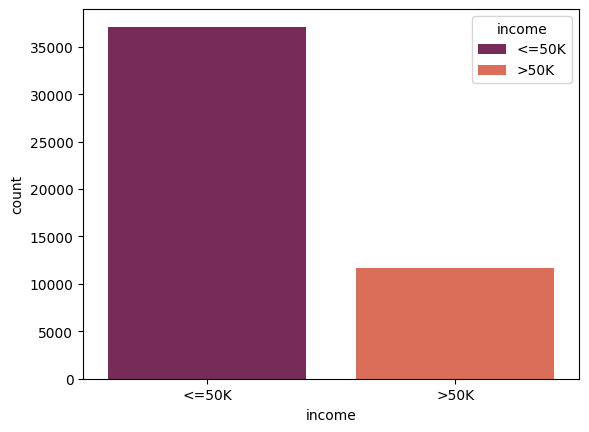

In [ ]:
sns.countplot(x = df['income'], palette='rocket', hue = df['income'], legend=True); #imbalanced data

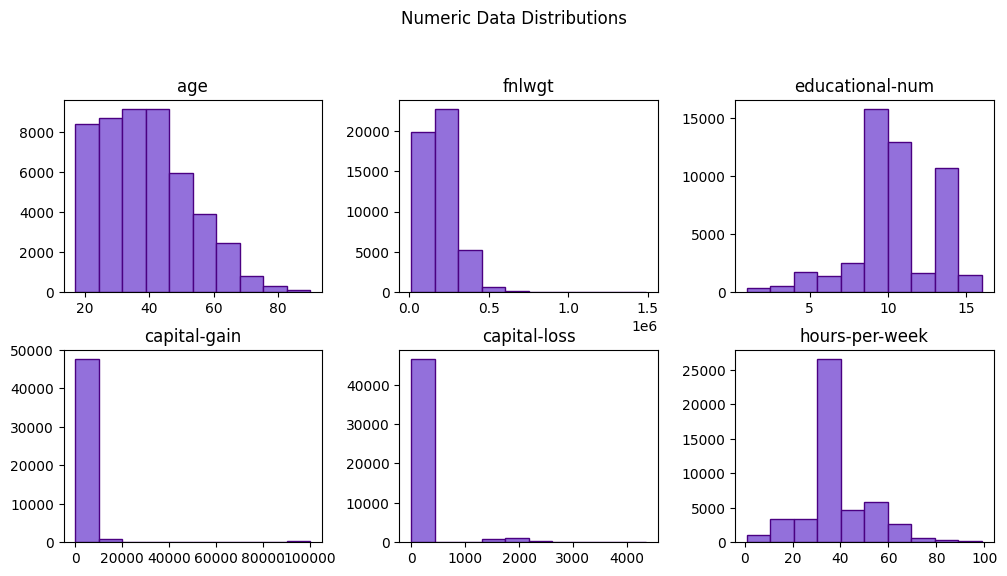

In [ ]:
df[numeric_data].hist(figsize=(12,9),layout=(3,3),color='mediumpurple',edgecolor='indigo',grid=False)
plt.suptitle('Numeric Data Distributions');

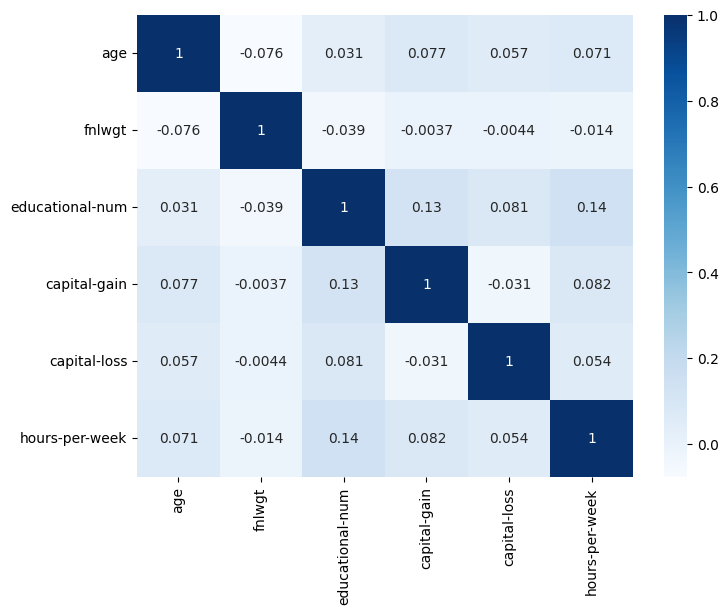

In [ ]:
# correlation between numeric attributes
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_data].corr(),annot=True,cmap = 'Blues');

In [ ]:
for num in numeric_data:
  print(f"The min of {num} = {df[num].min()}, and the max = {df[num].max()}")

The min of age = 17, and the max = 90
The min of fnlwgt = 12285, and the max = 1490400
The min of educational-num = 1, and the max = 16
The min of capital-gain = 0, and the max = 99999
The min of capital-loss = 0, and the max = 4356
The min of hours-per-week = 1, and the max = 99


<ipython-input-16-02c48c2f850f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["age"],kde=True,bins=90,color="#0072B2")


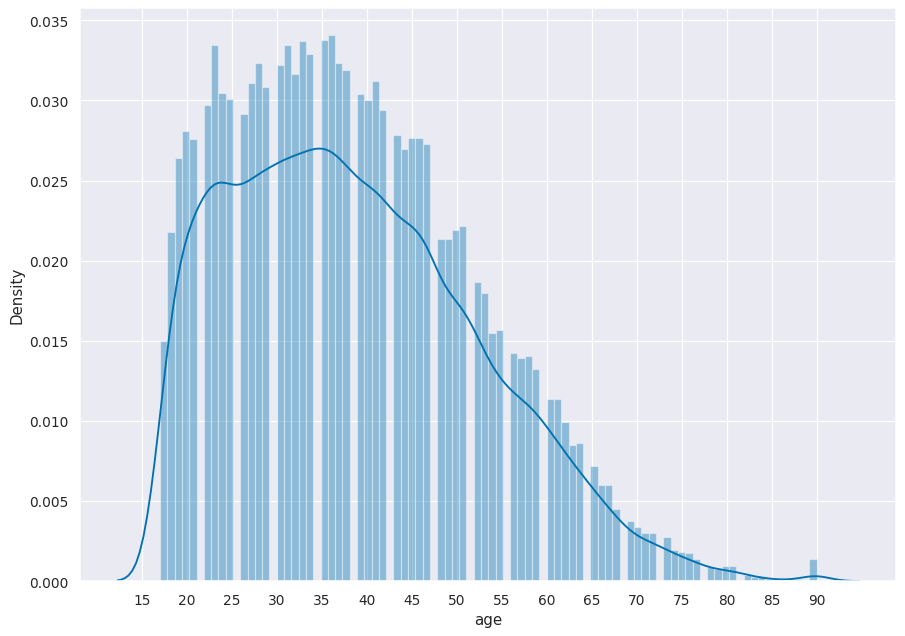

In [ ]:
# Note that age is skewed and has outliers
sns.set(rc={'figure.figsize':(11.7,8.27),'figure.dpi':90})
sns.distplot(x=df["age"],kde=True,bins=90,color="#0072B2")
plt.xticks(np.arange(15,95,5))
plt.xlabel("age")
plt.show()

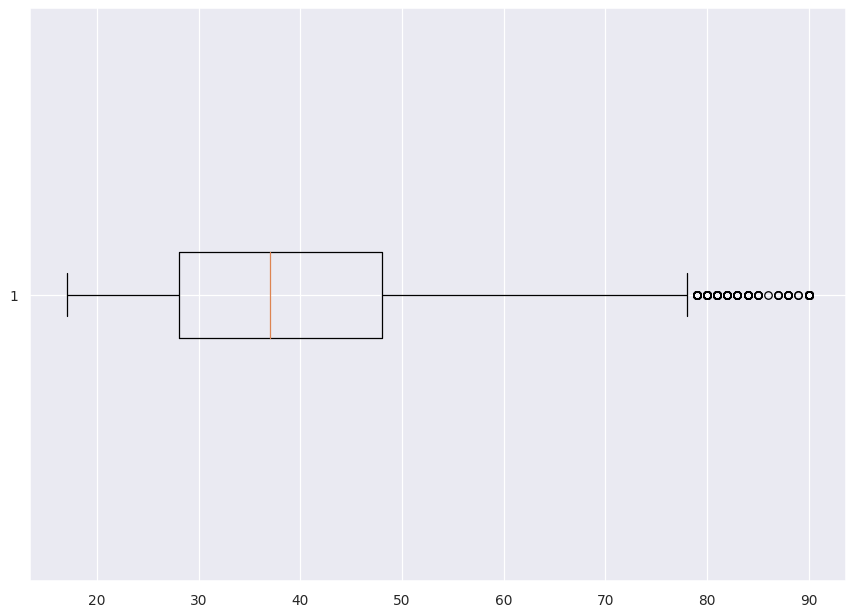

In [ ]:
plt.boxplot(df['age'], vert=False);

In [ ]:
Q3_age = np.percentile(df['age'], 75)
Q1_age = np.percentile(df['age'], 25)
iqr = Q3_age - Q1_age
max_age = Q3_age + (1.5 * iqr)
max_age

78.0

In [ ]:
## Dropping outliers > 78

df = df[df['age'] <= 80]
df.shape

(48643, 15)

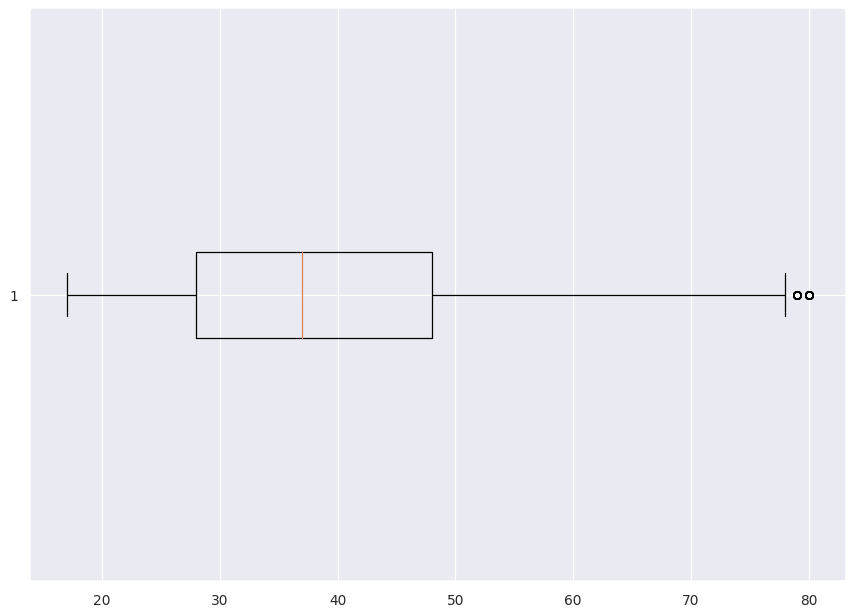

In [ ]:
plt.boxplot(df['age'], vert=False);

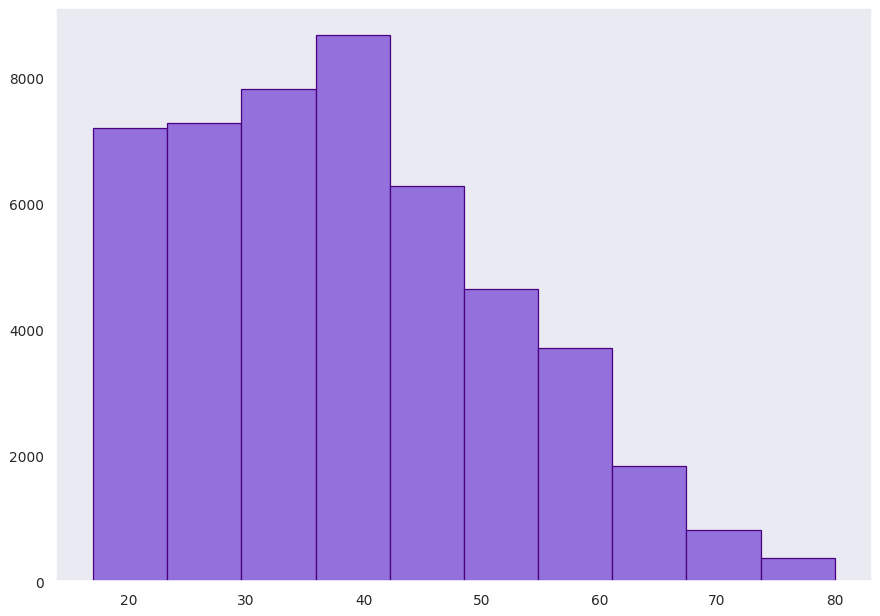

In [ ]:
df['age'].hist(color='mediumpurple',edgecolor='indigo',grid=False);

<ipython-input-22-f197c42590e5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["age"],kde=True,bins=90,color="#0072B2")


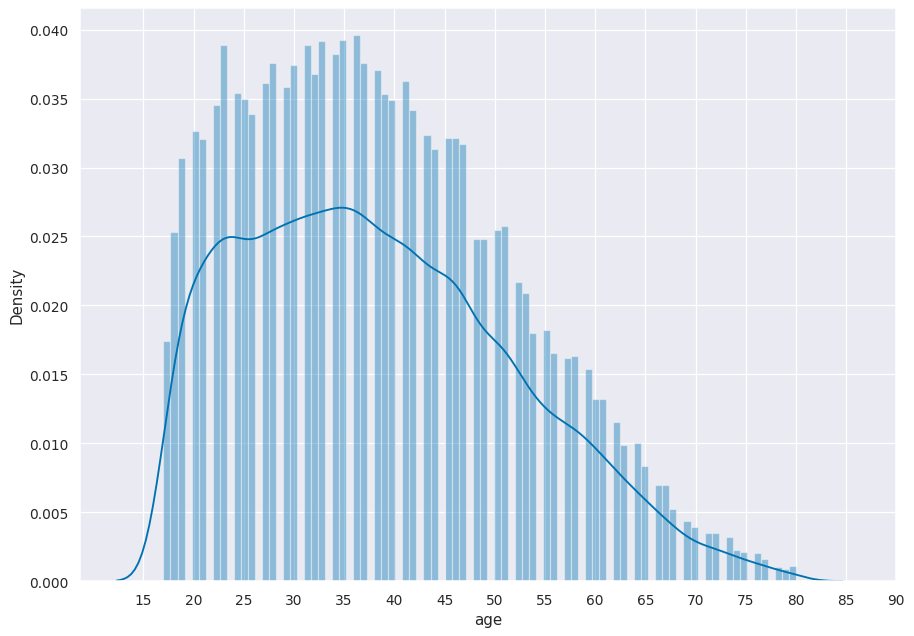

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27),'figure.dpi':90})
sns.distplot(x=df["age"],kde=True,bins=90,color="#0072B2")
plt.xticks(np.arange(15,95,5))
plt.xlabel("age")
plt.show();

## Checking for Outliers.

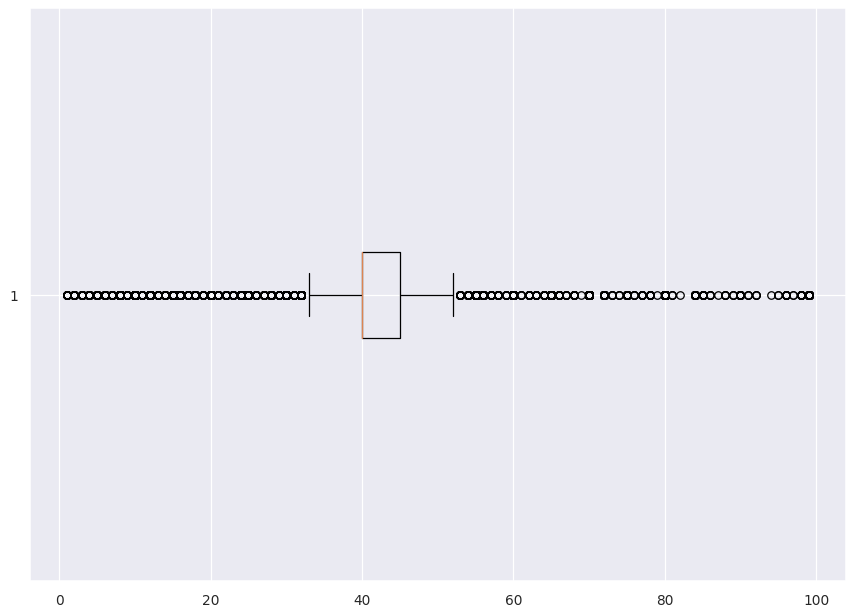

In [ ]:
# Outliers for Hours per week features
plt.boxplot(df['hours-per-week'], vert=False);

In [ ]:
## Checking outliers for Hours-per-week column

Q3_hours = np.percentile(df['hours-per-week'], 75)
Q1_hours = np.percentile(df['hours-per-week'], 25)
iqr = Q3_hours - Q1_hours
max_hours = Q3_hours + (1.5 * iqr)
min_hours = Q3_hours - (1.5 * iqr)
print(max_hours)
print(min_hours)

52.5
37.5


In [ ]:
outlires_hours = df[(df['hours-per-week'] > 52.5) | (df['hours-per-week'] < 37.5)]
outlires_hours = pd.DataFrame(outlires_hours)
outlires_hours

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48825,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48829,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [ ]:
highIncome_lowHours = pd.DataFrame(outlires_hours[(outlires_hours['hours-per-week'] < 37.5) & (outlires_hours['income'] == '>50K')])
print(f"Shape = {highIncome_lowHours.shape}")
highIncome_lowHours['race'].value_counts()

Shape = (948, 15)


,count
race,
White,864
Black,46
Asian-Pac-Islander,28
Amer-Indian-Eskimo,5
Other,5


 More than 75% of adults gain >50K and work less than 37.5 hours their race is white.

#### After checking the numerical data, I found that Capital gain and Capital loss more than 75% of their values are zeros. So, I will drop them.

# Categorical Data

In [ ]:
df[categorical_data].describe().transpose()

,count,unique,top,freq
workclass,48643,9,Private,33790
education,48643,16,HS-grad,15727
marital-status,48643,7,Married-civ-spouse,22306
occupation,48643,15,Prof-specialty,6147
relationship,48643,6,Husband,19646
race,48643,5,White,41581
gender,48643,2,Male,32515
native-country,48643,42,United-States,43664
income,48643,2,<=50K,36987


In [ ]:
# Checking unique values for each categorical feature
for cat in categorical_data:
  print(f"Unique values in {cat} are: {df[cat].unique()}")
  print()

Unique values in workclass are: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in education are: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Unique values in marital-status are: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in occupation are: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Unique values in relationship are: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Unique values in race are: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Unique 

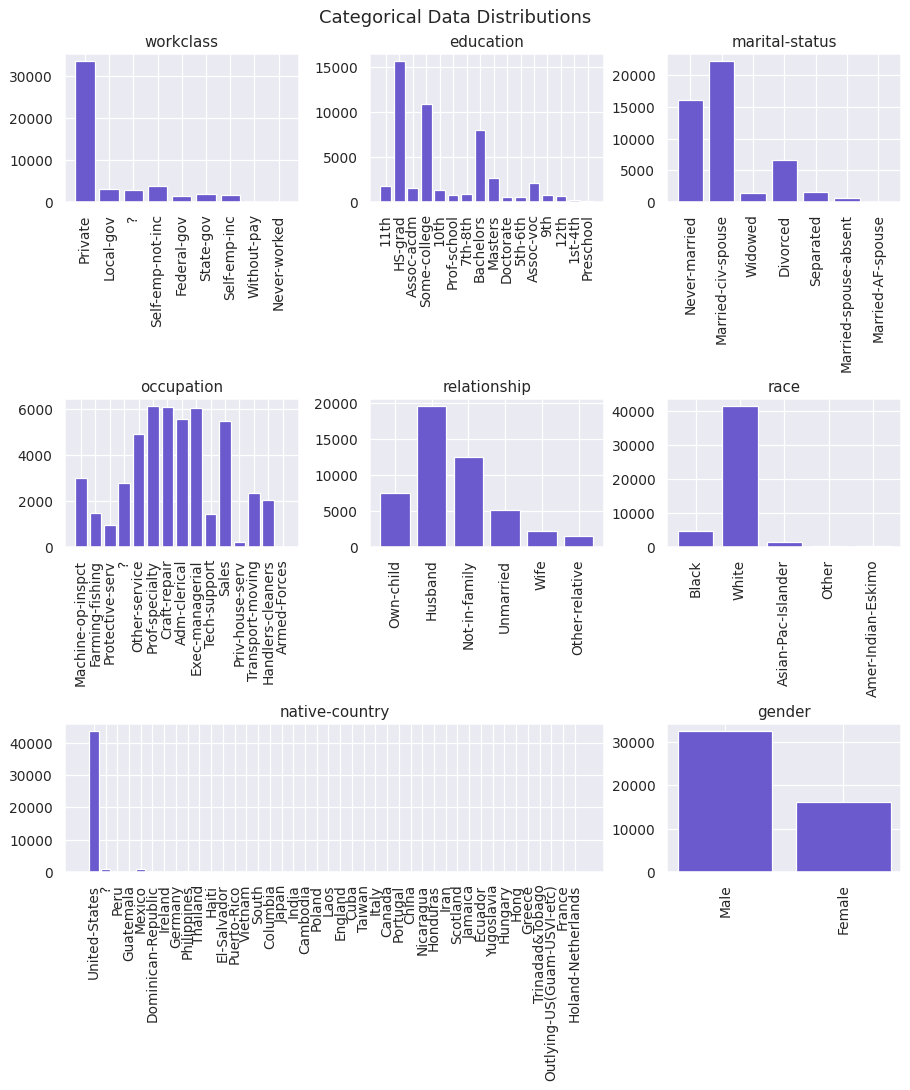

In [ ]:
fig = plt.figure(figsize=(10,12),layout='constrained')
fig.suptitle('Categorical Data Distributions')

gs = fig.add_gridspec(3,3)


ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(list(df[categorical_data[0]].value_counts(sort=False).keys()),
             list(df[categorical_data[0]].value_counts(sort=False).values),color='slateblue')
ax1.set_title(categorical_data[0])
ax1.tick_params(axis='x', rotation=90)

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(list(df[categorical_data[1]].value_counts(sort=False).keys()),
             list(df[categorical_data[1]].value_counts(sort=False).values),color='slateblue')
ax2.set_title(categorical_data[1])
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(list(df[categorical_data[2]].value_counts(sort=False).keys()),
             list(df[categorical_data[2]].value_counts(sort=False).values),color='slateblue')
ax3.set_title(categorical_data[2])
ax3.tick_params(axis='x', rotation=90)

ax4 = fig.add_subplot(gs[1, 0])
ax4.bar(list(df[categorical_data[3]].value_counts(sort=False).keys()),
             list(df[categorical_data[3]].value_counts(sort=False).values),color='slateblue')
ax4.set_title(categorical_data[3])
ax4.tick_params(axis='x', rotation=90)

ax5 = fig.add_subplot(gs[1, 1])
ax5.bar(list(df[categorical_data[4]].value_counts(sort=False).keys()),
             list(df[categorical_data[4]].value_counts(sort=False).values),color='slateblue')
ax5.set_title(categorical_data[4])
ax5.tick_params(axis='x', rotation=90)

ax6 = fig.add_subplot(gs[1, 2])
ax6.bar(list(df[categorical_data[5]].value_counts(sort=False).keys()),
             list(df[categorical_data[5]].value_counts(sort=False).values),color='slateblue')
ax6.set_title(categorical_data[5])
ax6.tick_params(axis='x', rotation=90)

ax7 = fig.add_subplot(gs[2, 0:2])
ax7.bar(list(df[categorical_data[7]].value_counts(sort=False).keys()),
             list(df[categorical_data[7]].value_counts(sort=False).values),color='slateblue')
ax7.set_title(categorical_data[7])
ax7.tick_params(axis='x', rotation=90)

ax8 = fig.add_subplot(gs[2, 2])
ax8.bar(list(df[categorical_data[6]].value_counts(sort=False).keys()),
             list(df[categorical_data[6]].value_counts(sort=False).values),color='slateblue')
ax8.set_title(categorical_data[6])
ax8.tick_params(axis='x', rotation=90)



plt.show()

 Found some missing values in "workclass", "occupation" and "native-country" features but not considered as nulls. So, I will impute these missing value by replacing them with the most frequent value in each feature

In [ ]:
# Replace each ? with mode value in its feature

df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace('?', 'United-States')

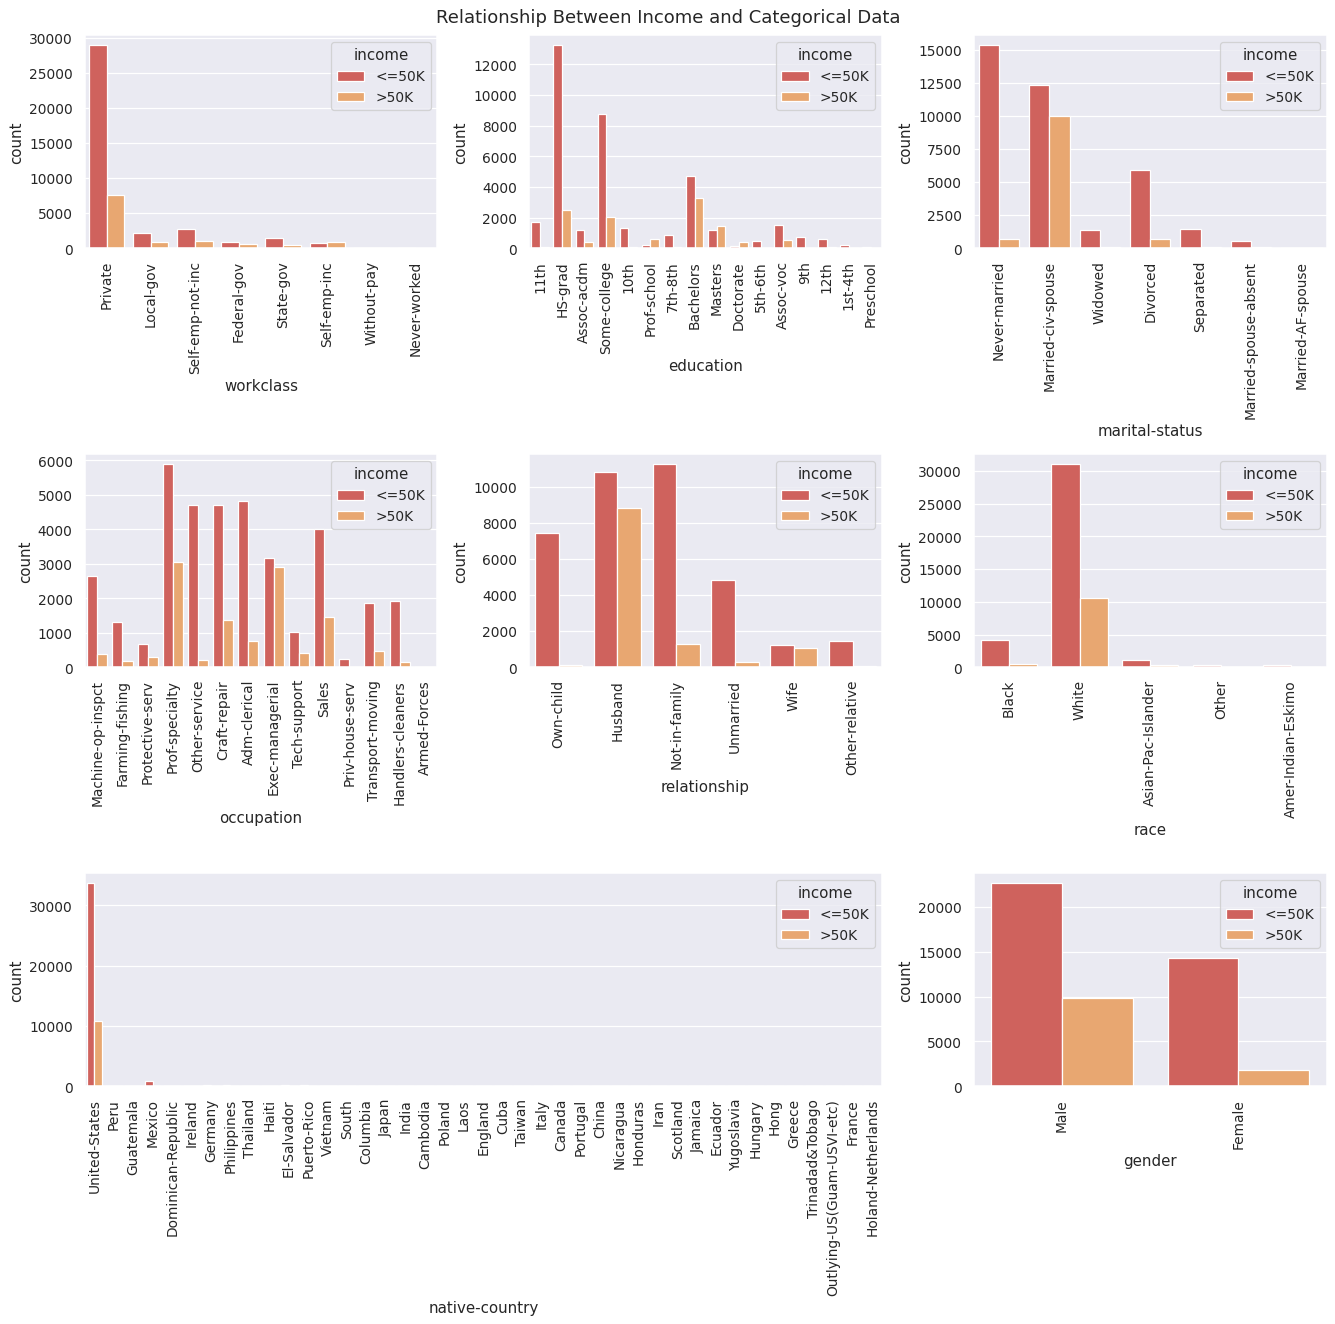

In [ ]:
fig = plt.figure(figsize=(15,15),layout='tight')
fig.suptitle('Relationship Between Income and Categorical Data')

gs = fig.add_gridspec(3,3)

sns.set_palette("Spectral")

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(ax=ax1, data=df, x=categorical_data[0],hue='income')
ax1.tick_params(axis='x', rotation=90)

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(ax=ax2, data=df, x=categorical_data[1],hue='income')
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(ax=ax3, data=df, x=categorical_data[2],hue='income')
ax3.tick_params(axis='x', rotation=90)

ax4 = fig.add_subplot(gs[1, 0])
sns.countplot(ax=ax4, data=df, x=categorical_data[3],hue='income')
ax4.tick_params(axis='x', rotation=90)

ax5 = fig.add_subplot(gs[1, 1])
sns.countplot(ax=ax5, data=df, x=categorical_data[4],hue='income')
ax5.tick_params(axis='x', rotation=90)

ax6 = fig.add_subplot(gs[1, 2])
sns.countplot(ax=ax6, data=df, x=categorical_data[5],hue='income')
ax6.tick_params(axis='x', rotation=90)

ax7 = fig.add_subplot(gs[2, 0:2])
sns.countplot(ax=ax7, data=df, x=categorical_data[7],hue='income')
ax7.tick_params(axis='x', rotation=90)

ax8 = fig.add_subplot(gs[2, 2])
sns.countplot(ax=ax8, data=df, x=categorical_data[6],hue='income')
ax8.tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
pd.DataFrame(df.groupby('occupation')['income'].value_counts())

count
occupation        income       
Adm-clerical      <=50K    4828
                  >50K      766
Armed-Forces      <=50K      10
                  >50K        5
Craft-repair      <=50K    4716
                  >50K     1380
Exec-managerial   <=50K    3158
                  >50K     2899
Farming-fishing   <=50K    1303
                  >50K      170
Handlers-cleaners <=50K    1930
                  >50K      138
Machine-op-inspct <=50K    2642
                  >50K      371
Other-service     <=50K    4705
                  >50K      204
Priv-house-serv   <=50K     235
                  >50K        3
Prof-specialty    <=50K    5880
                  >50K     3042
Protective-serv   <=50K     672
                  >50K      308
Sales             <=50K    4014
                  >50K     1469
Tech-support      <=50K    1024
                  >50K      420
Transport-moving  <=50K    1870
                  >50K      481

In [ ]:
pd.DataFrame(df.groupby('workclass')['income'].value_counts())

count
workclass        income       
Federal-gov      <=50K     869
                 >50K      561
Local-gov        <=50K    2203
                 >50K      925
Never-worked     <=50K      10
Private          <=50K   28925
                 >50K     7630
Self-emp-inc     >50K      933
                 <=50K     750
Self-emp-not-inc <=50K    2761
                 >50K     1075
State-gov        <=50K    1450
                 >50K      530
Without-pay      <=50K      19
                 >50K        2

<ipython-input-36-30a35691890d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['educational-num'],palette='plasma',
<ipython-input-36-30a35691890d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['education'],palette='plasma',


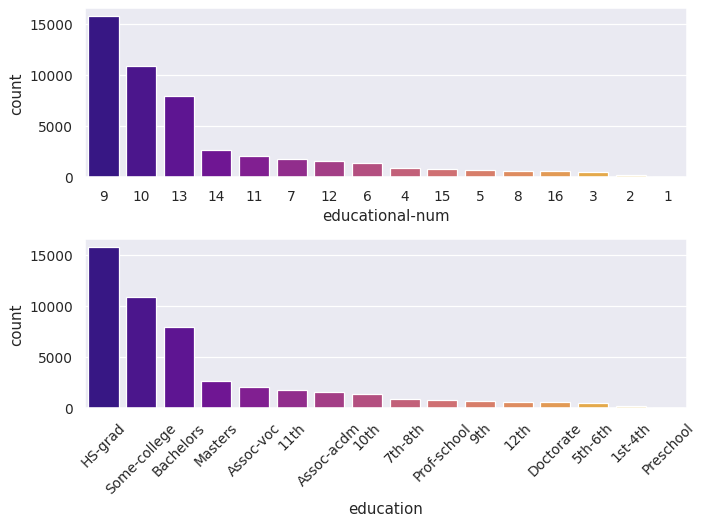

In [ ]:
plt.figure(figsize=(8,6),layout='tight')
plt.subplot(2,1,1)
sns.countplot(x=df['educational-num'],palette='plasma',
             order=df['educational-num'].value_counts().index)
plt.subplot(2,1,2)
sns.countplot(x=df['education'],palette='plasma',
             order=df['education'].value_counts().index)
plt.xticks(rotation=45);

#### By plotting the counts of education and education.num columns, we can see they represent the same thing.

#### And the "Capital gain" and "Capital Loss" columns most of their values = 0. I can drop them.

In [ ]:
df.drop(columns=['educational-num', 'capital-gain', 'capital-loss', 'fnlwgt'],inplace=True)
df

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


# Feature Engineering

Some Features has a lot of unique values and some of them have the same meaning, which can be considered as one unique value.

In [ ]:
# Education feature
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'School')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher')
# I replace the similar labels in Education feature with the same, decreasing the number of unique values that will not affect the accuracy.

In [ ]:
# Martial status
df['marital-status']= df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
df['marital-status']= df['marital-status'].replace(['Never-married'], 'Not-Married')
df['marital-status']= df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'Other')

In [ ]:
df[categorical_data].describe().transpose()

,count,unique,top,freq
workclass,48643,8,Private,36555
education,48643,6,HS-grad,15727
marital-status,48643,3,Married,22343
occupation,48643,14,Prof-specialty,8922
relationship,48643,6,Husband,19646
race,48643,5,White,41581
gender,48643,2,Male,32515
native-country,48643,41,United-States,44515
income,48643,2,<=50K,36987


In [ ]:
pd.DataFrame(df.groupby('education')['income'].value_counts())

count
education income       
Bachelors <=50K    4688
          >50K     3305
Doctorate >50K      431
          <=50K     163
HS-grad   <=50K   13231
          >50K     2496
Higher    <=50K   11719
          >50K     3604
Masters   >50K     1456
          <=50K    1191
School    <=50K    5995
          >50K      364

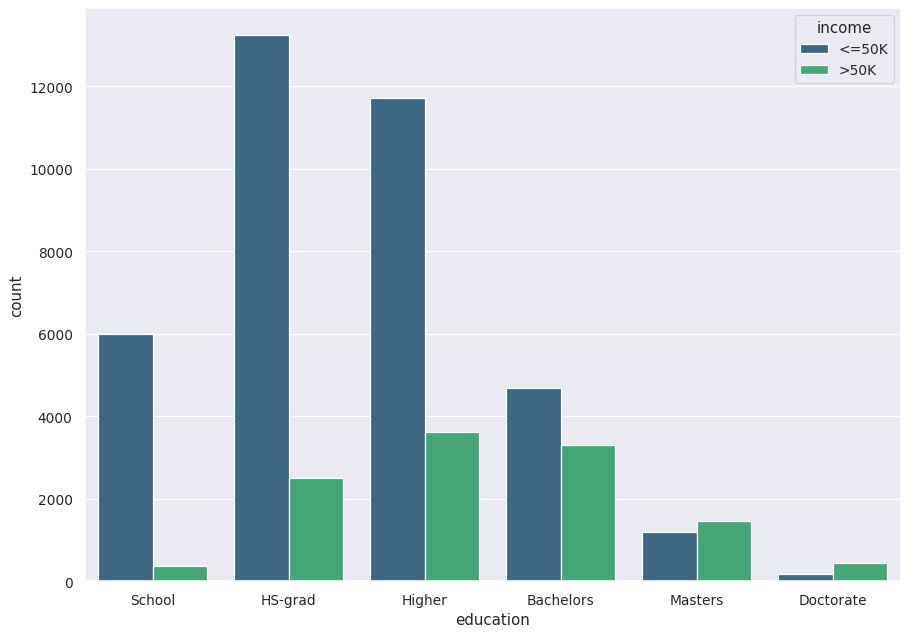

In [ ]:
sns.countplot(x=df['education'],hue=df['income'],palette="viridis");

In [ ]:
pd.DataFrame(df.groupby('marital-status')['income'].value_counts())

count
marital-status income       
Married        <=50K   12370
               >50K     9973
Not-Married    <=50K   15329
               >50K      729
Other          <=50K    9288
               >50K      954

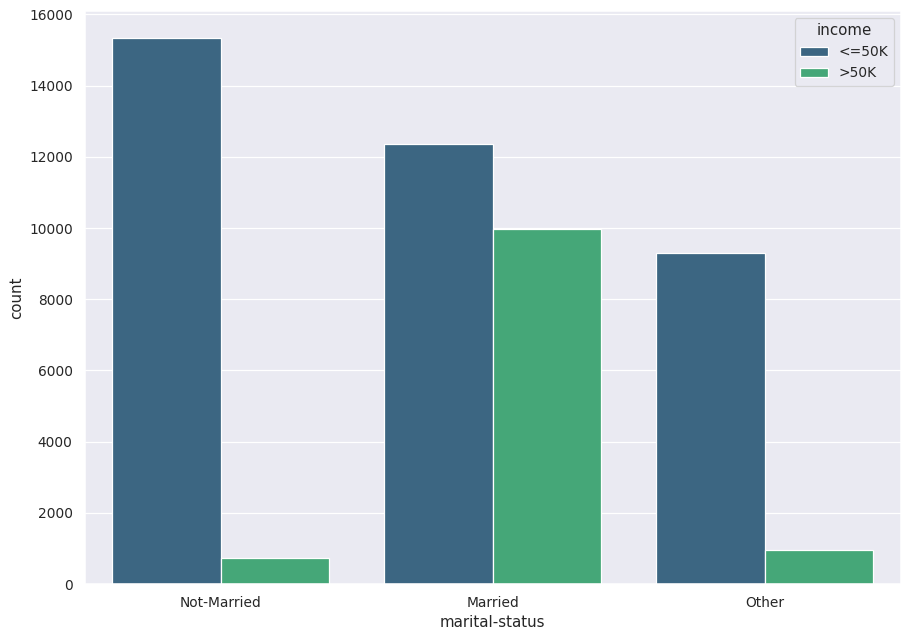

In [ ]:
sns.countplot(x=df['marital-status'],hue=df['income'],palette="viridis");

In [ ]:
pd.DataFrame(df.groupby('occupation')['gender'].value_counts())

count
occupation        gender       
Adm-clerical      Female   3754
                  Male     1840
Armed-Forces      Male       15
Craft-repair      Male     5773
                  Female    323
Exec-managerial   Male     4317
                  Female   1740
Farming-fishing   Male     1378
                  Female     95
Handlers-cleaners Male     1814
                  Female    254
Machine-op-inspct Male     2211
                  Female    802
Other-service     Female   2692
                  Male     2217
Priv-house-serv   Female    224
                  Male       14
Prof-specialty    Male     5428
                  Female   3494
Protective-serv   Male      858
                  Female    122
Sales             Male     3543
                  Female   1940
Tech-support      Male      883
                  Female    561
Transport-moving  Male     2224
                  Female    127

In [ ]:
df['income'].value_counts(normalize=True)

,proportion
income,
<=50K,0.760377
>50K,0.239623


# Encoding

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])   # 1 = Male, 0 = Female
df['income'] = le.fit_transform(df['income'])   # 0 = <= 50, 1 = >50
df['marital-status'] = le.fit_transform(df['marital-status'])
df['race'] = le.fit_transform(df['race'])
df['relationship'] = le.fit_transform(df['relationship'])
df['workclass'] = le.fit_transform(df['workclass'])
df['occupation']  = le.fit_transform(df['occupation'])
df['native-country'] = le.fit_transform(df['native-country'])
df['education'] = le.fit_transform(df['education'])  # Can be encoded with Ordinal Encoding too
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,3,5,1,6,3,2,1,40,38,0
1,38,3,2,0,4,0,4,1,50,38,0
2,28,1,3,0,10,0,4,1,40,38,1
3,44,3,3,0,6,0,2,1,40,38,1
4,18,3,3,1,9,3,4,0,30,38,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48643 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48643 non-null  int64
 1   workclass       48643 non-null  int64
 2   education       48643 non-null  int64
 3   marital-status  48643 non-null  int64
 4   occupation      48643 non-null  int64
 5   relationship    48643 non-null  int64
 6   race            48643 non-null  int64
 7   gender          48643 non-null  int64
 8   hours-per-week  48643 non-null  int64
 9   native-country  48643 non-null  int64
 10  income          48643 non-null  int64
dtypes: int64(11)
memory usage: 4.5 MB


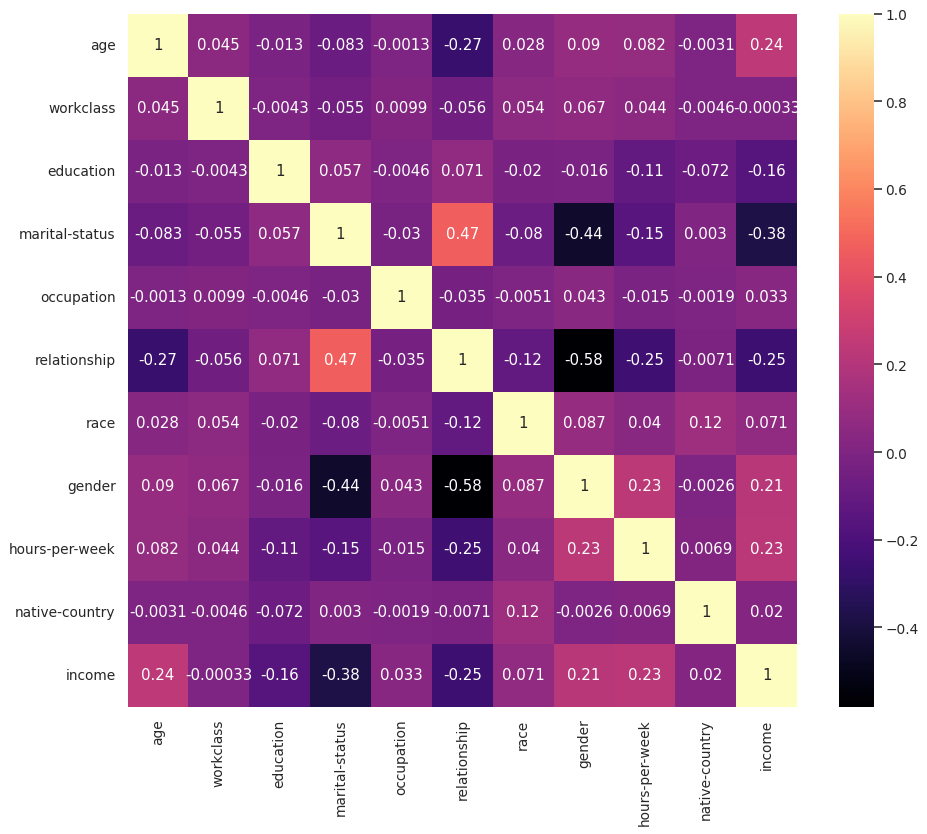

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap = 'magma');

# Handling imbalanced data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns='income')
y = df['income']

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)
X_sm.shape

(73974, 10)

In [ ]:
y_sm.value_counts()

,count
income,
0,36987
1,36987


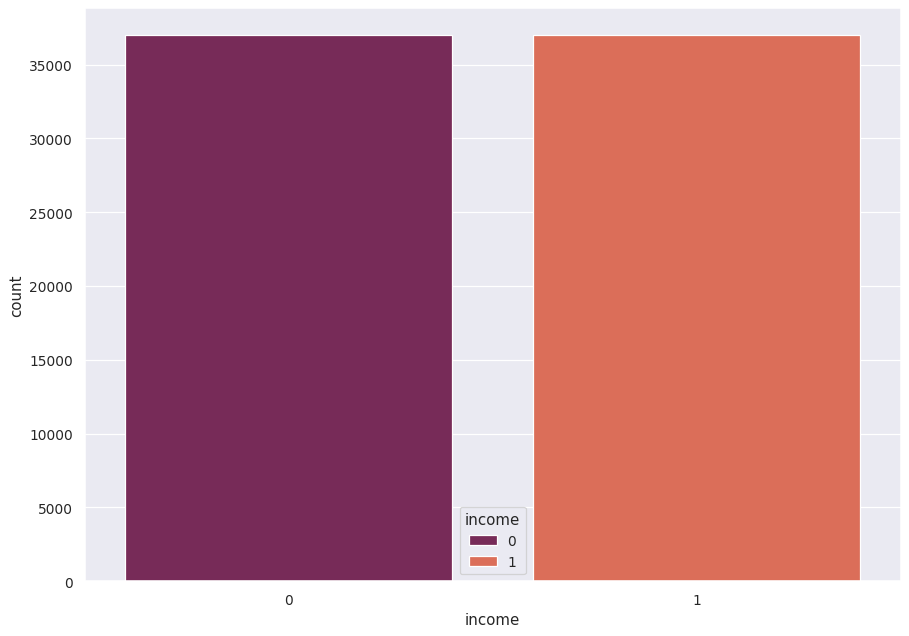

In [ ]:
sns.countplot(x = y_sm, palette='rocket', hue = y_sm, legend=True);

# Scaling Data

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_sm)
scaled_data = pd.DataFrame(scaled_data, columns = X_sm.columns)
scaled_data

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,-1.205484,-0.045855,1.866445,0.626926,-0.047858,1.149313,-2.123088,0.620689,-0.177943,0.251171
1,-0.184857,-0.045855,-0.179690,-0.724717,-0.554734,-0.715009,0.370554,0.620689,0.643393,0.251171
2,-0.969955,-1.841543,0.502355,-0.724717,0.965893,-0.715009,0.370554,0.620689,-0.177943,0.251171
3,0.286202,-0.045855,0.502355,-0.724717,-0.047858,-0.715009,-2.123088,0.620689,-0.177943,0.251171
4,-1.755053,-0.045855,0.502355,0.626926,0.712455,1.149313,0.370554,-1.611113,-0.999279,0.251171
...,...,...,...,...,...,...,...,...,...,...
73969,1.071300,0.851989,-0.179690,-0.724717,1.219331,-0.715009,0.370554,0.620689,1.054061,0.251171
73970,1.463849,-0.045855,-0.179690,-0.724717,-1.061610,-0.715009,0.370554,0.620689,-0.177943,0.251171
73971,-0.184857,-0.045855,0.502355,-0.724717,-0.301296,-0.715009,0.370554,0.620689,0.479126,0.251171
73972,1.071300,-0.045855,0.502355,-0.724717,-1.061610,-0.715009,0.370554,0.620689,-0.177943,0.251171


# Some insights based on the EDA Phase (Taken into account the imbalanced dataset as 76% of the dataset classified as <=50K class.):

1) Based on the correlation matrix: the "Age", "Gender", "marital-status" and "hours-per-week" features have a strong relation with the target column "Income".

2) The "Prof-specialty" occupation earn more than 50000 as income.

3) Most adults have a private workclass.

4) Adults who have an education higher than High school grade earn >50K income.

5) Most Females work as Adm-clerical.

6) Married adults earn higher income.

7)  More than 75% of adults gain >50K and work less than 37.5 hours their race is white.

# Naive Bayes Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.20, random_state=42
)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train);

In [ ]:
y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)    ## Feature Selection is needed to improve accuracy

Accuracy: 0.7447786414329165
F1 Score: 0.7450663577065297


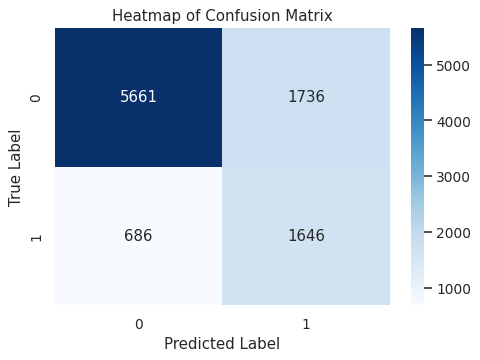


              precision    recall  f1-score   support

           0       0.89      0.77      0.82      7397
           1       0.49      0.71      0.58      2332

    accuracy                           0.75      9729
   macro avg       0.69      0.74      0.70      9729
weighted avg       0.79      0.75      0.76      9729



In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


class_report = classification_report(y_test, y_pred)

print()
print(class_report)